INF200 Lecture No 2
===================

***Hans Ekkehard Plesser, NMBU, 19 September 2022***


# Today's topics

* Recording of lectures
* Follow-up from last week: A solution with Pandas
* Collecting data
    - Reading from files
    - Character encoding
    - Parsing strings
    - Reading some widely used formats: CSV, Excel, JSON, YAML

---------

# Recording of lectures

- From 19 September on, lectures will be recorded, but not streamed
- Recordings will be made available Tuesdays around 16.00
- Recordings will run precisely
    - 14.15–15.00
    - 15.15–16.00
- Recordings are done with a camera at the back of the auditorium

### Formalities concerning recording

- NMBU is responsible for recording.
- Recordings are made to facilitate learning in INF200.  
- Recordings are stored, shared and published on Panopto Video via Canvas.  
- Students and teachers of the course, also in subsequent years, have access to the recordings.
- By sitting in the back towards the sides, you should be outside the camera view.
- If you want to ask questions without being recorded, please ask in the break.
- Attending the lecture sitting in a place in view of the camera or speaking up during the lecture, is a declaration of consent to being recorded.


------

# Follow-up: Counting the population with Pandas

## Solution using core Python only

In [1]:
population = {}
with open('../l01/norway_municipalities_2017.csv', 'r') as in_file:
    headers = in_file.readline().strip().split(',')

    for line in in_file:
        _, district, pop = line.split(',')
        population[district] = population.get(district, 0) + int(pop)

print(f'{headers[1]:22s}{headers[2]:>11s}')
print(33 * '-')
for district, pop in sorted(population.items(), key=lambda e: e[1], reverse=True):
    print(f'{district:22s}{pop:11d}')

District               Population
---------------------------------
Oslo                       666759
Akershus                   604368
Hordaland                  519963
Rogaland                   472024
Sør-Trøndelag              317363
Østfold                    292893
Buskerud                   279714
Møre og Romsdal            266274
Vestfold                   247048
Nordland                   242866
Hedmark                    196190
Oppland                    189479
Vest-Agder                 184116
Telemark                   173307
Troms - Romsa              165632
Nord-Trøndelag             137233
Aust-Agder                 116673
Sogn og Fjordane           110266
Finnmark - Finnmárku        76149


## Solutions based on Pandas

In [2]:
import pandas as pd

#### A step-by-step solution

In [3]:
population_per_municipality = pd.read_csv('../l01/norway_municipalities_2017.csv')
population_per_municipality

Municipality              District  Population
0               Halden               Østfold       30790
1                 Moss               Østfold       32407
2            Sarpsborg               Østfold       55127
3          Fredrikstad               Østfold       80121
4               Hvaler               Østfold        4517
..                 ...                   ...         ...
421           Berlevåg  Finnmark - Finnmárku         991
422      Deatnu - Tana  Finnmark - Finnmárku        2911
423  Unjárga - Nesseby  Finnmark - Finnmárku         951
424          Båtsfjord  Finnmark - Finnmárku        2267
425       Sør-Varanger  Finnmark - Finnmárku       10199

[426 rows x 3 columns]

In [4]:
population_grouped_by_district = population_per_municipality.groupby('District')
population_grouped_by_district

In [5]:
population_per_district = population_grouped_by_district.sum()
population_per_district

Population
District                        
Akershus                  604368
Aust-Agder                116673
Buskerud                  279714
Finnmark - Finnmárku       76149
Hedmark                   196190
Hordaland                 519963
Møre og Romsdal           266274
Nord-Trøndelag            137233
Nordland                  242866
Oppland                   189479
Oslo                      666759
Rogaland                  472024
Sogn og Fjordane          110266
Sør-Trøndelag             317363
Telemark                  173307
Troms - Romsa             165632
Vest-Agder                184116
Vestfold                  247048
Østfold                   292893

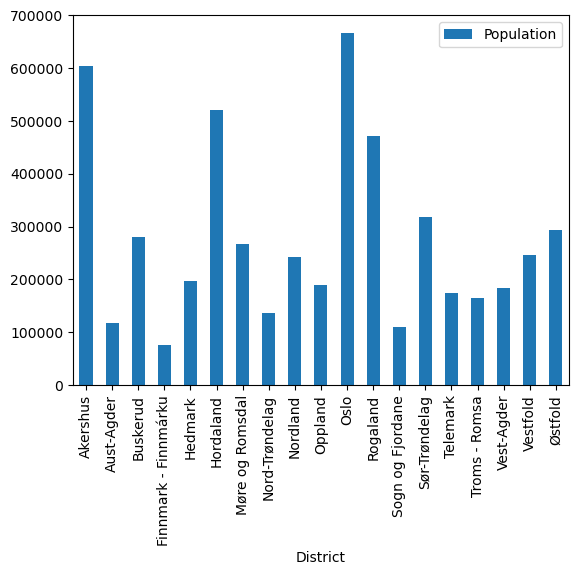

In [6]:
population_per_district.plot(kind='bar');

### A single-line solution

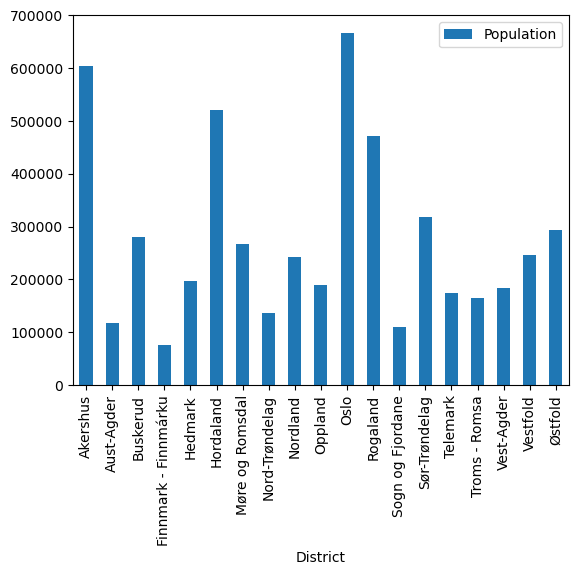

In [7]:
pd.read_csv('../l01/norway_municipalities_2017.csv').groupby('District').sum().plot(kind='bar');

-----

# Reading from files

- We will focus on files containing human-readable text.
- Much data is today available in such formats.
- If data is stored in a binary file format (not human-readable), there will most likely be a Python module available to read such a file.

### Important points about files

- Files are an *abstraction* for data stored on a computer
- A file may be in one of several different physical forms
    - On magnetic tape, magnetic disc, solid-state disk or USB stick
    - It may be on our local computer or on a remote server
    - On a tape, a file will be stored in one contiguous part of the tape
    - On a disk, a single file can be stored in many separate segments
- The operating system hides all this complexity from us (*abstracts away the details*)
- Thus, logically, a file
    - is a *linear* sequence of bytes: each byte has exactly one predecessor and one successor (except first/last)
    - has a name and a size (number of bytes)    
- Common operations on files include
    - open for reading and read, a byte at a time
    - move back and forth in the file (similar to winding/rewinding a tape); not covered here
    - open for writing (deletes existing content)
    - open to append new content
    - rename or move (later)

### Basic steps for reading from a file

1. Open file 
1. Read content
1. Close file

#### Important points

- Python "talks" to operating system (OS) to get access to file.
- File may be located on a remote server, OS hides this from us/handles this for us.
- We must close the file when we are done, otherwise OS may refuse to, e.g., delete the file or eject the USB-stick with the file on it.
- There is usually a limit on how many files we can have open simultaneously (~256).
- All open files will be closed when Python terminates.


### "Old-fashioned" approach: open, read, close explicitly

In [8]:
f = open('testfile_plain.txt')

In [9]:
text = f.read()
print(text)

This is a simple text file.

It contains four lines, of which one is empty.
The file does not end with a new line character.


In [10]:
f.close()

### Modern approach using a *context*

In [11]:
with open('testfile_plain.txt') as fc:
    text = fc.read()

print(text)

This is a simple text file.

It contains four lines, of which one is empty.
The file does not end with a new line character.


- File is only open inside context.
- File will be closed properly no matter how we leave the context.
- Highly recommended for new code.
- `f` and `fc` are *file handles*, Python objects giving us access to the file.

In [12]:
f

<_io.TextIOWrapper name='testfile_plain.txt' mode='r' encoding='UTF-8'>

### A very compact way (mostly for illustration here)

In [13]:
text = open('testfile_plain.txt').read()
text

'This is a simple text file.\n\nIt contains four lines, of which one is empty.\nThe file does not end with a new line character.'

In [14]:
print(text)

This is a simple text file.

It contains four lines, of which one is empty.
The file does not end with a new line character.


- `open()` returns a file handle, we apply `read()` directly to it.
- We never store the file handle in a variable. Python garbage collection then automatically deletes the file handle object when the statement completes and closes the file in the process.
- We display the `text` variable instead of `print()`ing it. This shows the newline characters `\n` explicitly.

### Three ways of reading a file: whole, by line, by letter

- `f.read()` reads the entire file, see above.
    - Simple, but may not work well for large files.
- `f.read(1)` reads one character at a time. 
    - With `f.seek()`, one can even move back and forth in a file while reading.
    - We will not cover letter-by-letter reading here.

#### Reading by line

In [15]:
with open('testfile_plain.txt') as tfile:
    for line in tfile:
        print(line)

This is a simple text file.



It contains four lines, of which one is empty.

The file does not end with a new line character.


- Why does this print extra lines?
- Print lines in "representation mode" using `repr()`:

In [16]:
with open('testfile_plain.txt') as tfile:
    for line in tfile:
        print(repr(line))

'This is a simple text file.\n'
'\n'
'It contains four lines, of which one is empty.\n'
'The file does not end with a new line character.'


- When reading linewise, line feed is included in the string.
- `print()` also adds a line break.
- Two solutions:
    - tell `print()` not to add line break
    - `rstrip('\n')` line feed off (usually most sensible)

In [17]:
with open('testfile_plain.txt') as tfile:
    for line in tfile:
        print(line, end='')

This is a simple text file.

It contains four lines, of which one is empty.
The file does not end with a new line character.

In [18]:
with open('testfile_plain.txt') as tfile:
    for line in tfile:
        print(line.rstrip('\n'))

This is a simple text file.

It contains four lines, of which one is empty.
The file does not end with a new line character.


- Why would it not be a good idea to just use `line.strip()` above?
- What could go wrong if we just printed all except the last letter in a line, i.e., used `print(line[:-1])`?

#### Python goodie: line numbers with `enumerate()`

In [19]:
with open('testfile_plain.txt') as tfile:
    for line_number, line in enumerate(tfile):
        print(f'{line_number:03d}: {line.strip()}')

000: This is a simple text file.
001: 
002: It contains four lines, of which one is empty.
003: The file does not end with a new line character.


- Always use `enumerate()` when you need position and value in a sequence!
- The following code would be decidedly unpythonic since it uses no context and manages the counter manually

In [20]:
f = open('testfile_plain.txt')
line_number = 0
for line in f:
    print(f'{line_number:03d}: {line.strip()}')
    line_number += 1
f.close()

000: This is a simple text file.
001: 
002: It contains four lines, of which one is empty.
003: The file does not end with a new line character.


### Text mode vs binary mode

- We usually read files in text mode: Python handles letters outside A-Z intelligently for us.
    - Makes sense for text files only.
    - This is default.
- We can also read files in *binary mode*: Python reads strictly one byte (8 bits) at a time.
    - Can be useful to inspect content of a file.
    - Pass `'br'` as second argument to read in binary mode.
        - `b`: binary mode
        - `r`: open for reading
- As an example, we read a test file with some Norwegian special characters first in text mode and then in binary mode.
    - The output below will look strange on Windows. The explanation follows in the section "Character encoding" below.

In [21]:
open('testfile_utf8.txt').read()

'Vi er på Ås, et særdeles fint sted i Østnorge.'

In [22]:
open('testfile_utf8.txt', 'br').read()

b'Vi er p\xc3\xa5 \xc3\x85s, et s\xc3\xa6rdeles fint sted i \xc3\x98stnorge.'

- The `b` in `b'...'` indicates that this is a byte string, not a normal Python string.

### A quick look at line endings

- Marking of line endings is based on mechanical typewriter logic
    - https://youtu.be/G4nX0Xrn-wo?t=96
    - LF / Line Feed / `\n` / `^J`/ `0x0a`/ `10`: move paper one line upwards
    - CR / Carriage Return / `\r` / `^M` / `0x0d`/ `13`: send carriage back to left edge
- Unices (Unix, Linux, macOS) only use LF
- Windows uses CR and LF
- `open()` tries to handle this gracefully, dropping CR on reading
- When opening files from Windows on Unices, one can sometimes see stray CRs
- When opening files from Unices on Windows, sometimes all lines are turned into a single line

#### Reading a file from Windows as text file

In [23]:
open('testfile_win_utf8.txt').read()

'This file as been created\nwith Notepad under Win10.\n\nÅs is a town in Follo. The\ndistrict to the south of\nFollo is Østfold.\n'

#### Reading the same file in binary mode

- Special characters now shown as two bytes.
- Note the `\r\n` for each line break.

In [24]:
open('testfile_win_utf8.txt', 'br').read()

b'This file as been created\r\nwith Notepad under Win10.\r\n\r\n\xc3\x85s is a town in Follo. The\r\ndistrict to the south of\r\nFollo is \xc3\x98stfold.\r\n'

## Character encoding

### The beginnings

- [Morse code](https://en.wikipedia.org/wiki/Morse_code) and other telegraph codes
- [ASCII code](https://en.wikipedia.org/wiki/ASCII) from the 1960s
    - 7 bit (remaining bit in byte could be used as parity)
    - numerical values 0-127
    
|Range|Hex|Values|
|--:|--:|:--|
|0-31|0x00-0x1f|Control characters, e.g., "newline"|
|32|0x20|Space|
|33-47|0x21-02f|Punctuation|
|48-57|0x30-0x39|0-9|
|58-64|0x3a-0x40|Punctuation|
|65-90|0x41-0x5a|A-Z|
|91-96|0x5b-0x60|Punctuation|
|97-122|0x61-0x7a|a-z|
|123-126|0x7b-0x7e|Punctuation|
|127|0x7f|Control character DEL|

### The murky middle ages

- Wide range of incompatible characted coding schemes for characters outside A-Z, e.g., `latin-1`, `iso-8859-1`, `cp1252`, ...
- For a list of supported encodings, see https://docs.python.org/3/library/codecs.html#standard-encodings

### Today's solution: Unicode and UTF-8

- [Unicode (ISO 10646 standard)](https://en.wikipedia.org/wiki/Unicode)
- Provides 1,114,112 *code points* which can represent one symbol each
- Currently, 143,859 code points defined
    - 154 scripts/languages
    - mathematics
    - emojis, ...
- Code points up to 255 (0xff) agree with ASCII (to 127) and [ISO 8859-1 Latin 1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1) for 128-255
- Code points are abstract numbers
- Code points are written as U+005a (capital "Z")
- Actual storage: Unicode Transformation Format (UTF)
    - Most common: [UTF-8](https://en.wikipedia.org/wiki/UTF-8) ([almost 98% of all websites](https://w3techs.com/technologies/overview/character_encoding))
    - UTF-8 is default for Python
    - Also used: UTF-16 and UTF-32
    
<p><a href="https://commons.wikimedia.org/wiki/File:Utf8webgrowth.svg#/media/File:Utf8webgrowth.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Unicode_Web_growth.svg/1024px-Unicode_Web_growth.svg.png" alt="Utf8webgrowth.svg"></a><br>By <a href="//commons.wikimedia.org/wiki/User:Chris55" title="User:Chris55">Chris55</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="http://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=51421096">Link</a></p>

- UTF-8 encodes the number of a Unicode code point in 1, 2, 3 or 4 bytes
- UTF-8 is identical to ASCII up to 127
- Number of bytes and bits for different code point (CP) ranges ([after Wikipedia](https://en.wikipedia.org/wiki/UTF-8))

|Bytes|Bits for CP|First CP|Last CP|Byte 1|Byte 2|Byte 3|Byte 4|
|-:|-:|-:|-:|-:|-:|-:|-:|
|1|7|U+0000|U+007F|`0xxxxxxx`||||
|2|	11|	U+0080	|U+07FF|	`110xxxxx`	|`10xxxxxx`|||		
|3|	16|	U+0800	|U+FFFF|	`1110xxxx`	|`10xxxxxx`	|`10xxxxxx`||	
|4|	21|	U+10000	|U+10FFFF	|`11110xxx`	|`10xxxxxx`	|`10xxxxxx`	|`10xxxxxx`|


### Character encoding in Python

- `str` data type fully supports Unicode
- Each character in a string is represented by its Unicode code point
- `chr()` converts code point to single-chararcter string
- `ord()` converts single-character string to code point

Some examples

In [25]:
cps = [ord(c) for c in ['A', 'a', '0', 'æ', 'α', '€', 'サ', '😂']]
cps

[65, 97, 48, 230, 945, 8364, 12469, 128514]

The same expressed as hexadecimal numbers

In [26]:
[hex(cp) for cp in cps]

['0x41', '0x61', '0x30', '0xe6', '0x3b1', '0x20ac', '0x30b5', '0x1f602']

We use code point to character conversion to look at the character at the next code point:

In [27]:
for cp in cps:
    print('{:>6} {:>7} {} {}'.format(cp, hex(cp), chr(cp), chr(cp+1)))

    65    0x41 A B
    97    0x61 a b
    48    0x30 0 1
   230    0xe6 æ ç
   945   0x3b1 α β
  8364  0x20ac € ₭
 12469  0x30b5 サ ザ
128514 0x1f602 😂 😃


- Code point values are used when sorting strings

#### UTF-8 encoding

- Files contain bytes
- We need to convert characters (code points) to some byte-based encoding
- Default in Python: UTF-8
- Special data type: `bytes`
    - Similar to `str`
    - Exactly one byte per position: values 0-255
    - Elements are `int`
    - Literals are marked as `b'This is a bytes literal.'`
    - Values 128-255 in literals as escape sequences

In [28]:
blit = b'This is a bytes literal.'
print(blit)
print(type(blit))

b'This is a bytes literal.'
<class 'bytes'>


In [29]:
b'Ås'

SyntaxError: bytes can only contain ASCII literal characters (1835338396.py, line 1)

#### Encoding and decoding

- *Encoding*: converting a `str` to its `bytes` representation
- We must provide an encoding

In [30]:
bytes('This is an example.', encoding='utf-8')

b'This is an example.'

In [31]:
text = 'Vi er på Ås, et særdeles fint sted i Østnorge.'
text_utf8 = bytes(text, encoding='utf-8')
text_latin1 = bytes(text, encoding='latin1')
print('UTF-8  :', text_utf8)
print('Latin-1:', text_latin1)

UTF-8  : b'Vi er p\xc3\xa5 \xc3\x85s, et s\xc3\xa6rdeles fint sted i \xc3\x98stnorge.'
Latin-1: b'Vi er p\xe5 \xc5s, et s\xe6rdeles fint sted i \xd8stnorge.'


- Note the different encodings: UTF-8 requires two bytes for each Norwegian character
- *Decoding*: Converting from some encoding to Python `str`
- Strange things can happen if we choose the wrong encoding to decode with
- UTF-8 is default encoding

In [32]:
text_utf8.decode()

'Vi er på Ås, et særdeles fint sted i Østnorge.'

In [33]:
text_latin1.decode()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

- We can tell `decode()` how to handle errors

In [ ]:
text_latin1.decode(errors='replace')

In [34]:
text_latin1.decode(errors='ignore')

'Vi er p s, et srdeles fint sted i stnorge.'

In [35]:
text_latin1.decode(encoding='latin1')

'Vi er på Ås, et særdeles fint sted i Østnorge.'

In [36]:
text_utf8.decode(encoding='latin1')

'Vi er pÃ¥ Ã\x85s, et sÃ¦rdeles fint sted i Ã\x98stnorge.'

#### And a little Japanese example

- Let us encode 'サイトマップ' (japansk "saitomappo", i.e., "site map")
- We first look at the character codes

In [37]:
smap = 'サイトマップ'
for kana in smap:
    print(kana, ord(kana))

サ 12469
イ 12452
ト 12488
マ 12510
ッ 12483
プ 12503


- Now we encode in bytes

In [38]:
kana_utf8 = bytes(smap, encoding='utf-8')
kana_utf8

b'\xe3\x82\xb5\xe3\x82\xa4\xe3\x83\x88\xe3\x83\x9e\xe3\x83\x83\xe3\x83\x97'

- All katakana letters have been encoded as three-byte codes, beginning with `\xe3`
- Decoding this as, e.g., latin-1 gives nothing sensible

In [39]:
kana_utf8.decode('latin-1')

'ã\x82µã\x82¤ã\x83\x88ã\x83\x9eã\x83\x83ã\x83\x97'

### Reading text files with different encodings

- `open()` opens files in text mode with some encoding
- The default encoding is system dependent: UTF-8 on macOS/Linux, `cp1252` on (western?) Windows systems
- If reading a file gives strange results, try a different encoding
    - Finding the right encoding may require some experimentation
    - Always try UTF-8
    - If files are of Western European or North-American origin, `latin-1` and `cp1252` are good candidates (they are almost identical)

#### Reading with default encoding

- The next two cells open a file with the same content, but two different encodings.
- We do not specify the encoding explicity.
- `open()` then uses a system-dependent default encoding
- This leads to the following results
    - The first cell will display the text correctly on macOS/Linux and looks strange under Windows
    - The second cell will look fine under Windows and fail under macOS/Linux

In [40]:
open('testfile_utf8.txt').read()

'Vi er på Ås, et særdeles fint sted i Østnorge.'

In [41]:
open('testfile_latin1.txt').read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

#### Reading with explicit encoding

- We can specify the encoding explicitly.
- Then, both file will be read correctly under Windows and macOS/Linux.

In [42]:
open('testfile_utf8.txt', encoding='utf-8').read()

'Vi er på Ås, et særdeles fint sted i Østnorge.'

In [43]:
open('testfile_latin1.txt', encoding='latin-1').read()

'Vi er på Ås, et særdeles fint sted i Østnorge.'

### Python goodie: How to re-encode a file on a single line

- If you try to open the data file `weather_umb_2012.csv` as a textfile in Jupyter Lab (double-click on it), you get an error message saying that the file is not in UTF-8.
- How can we fix this?
    1. Find out which encoding the file has and read using that encoding. 
        - May require experimentation, but `latin-1` is a good guess.
    2. Write the file content to a new file with `utf-8` encoding.
        - Need to open destination file in write mode with letter `'w'`.
        - NB: This will overwrite an existing file with the same name.
        - Then just `write()` the file contents.
        
#### Step-by-step solution

In [44]:
with open('weather_umb_2012.csv', encoding='latin-1') as infile:
    weather_data = infile.read()
    
with open('weather_umb_2012_utf8.csv', 'w', encoding='utf-8') as outfile:
    outfile.write(weather_data)

#### One-line solution

In [45]:
open('weather_umb_2012_utf8.csv', 'w', encoding='utf-8').write(
                                         open('weather_umb_2012.csv', encoding='latin-1').read())

13044

- In this case we get the number of bytes written as result. 
- Above, it is not displayed because we `write()` inside a `with` block.

#### Could we write back to the same file?

- Above, we created a new file with the UTF-8 encoded data.
- Could we write to a file with the same name to replace the Latin-1 encoded file with the UTF-8 encoded file?
- Opening with mode `w` deletes existing file of given name
- Step-by-step solution
    - Yes
    - Minimal chance of data loss if computer crashes between reading and writing
- One-line solution
    - **Not safe!**
    - Two `open()` in one statement, order of opening is implementation dependent.
- Safe solution if we want to replace a file with a re-coded version
    1. Rename original file to a temporary name.
    2. Write re-encoded file to original file name.
    3. Delete original file.

### How can we learn more about `open()`?

- Online documentation
    - https://docs.python.org/3/library/functions.html
    - https://docs.python.org/3/library/functions.html#open
- Documentation is accessible right in the notebook!

In [46]:
open?

Signature:
open(
    file,
    mode='r',
    buffering=-1,
    encoding=None,
    errors=None,
    newline=None,
    closefd=True,
    opener=None,
)
Docstring:
Open file and return a stream.  Raise OSError upon failure.

file is either a text or byte string giving the name (and the path
if the file isn't in the current working directory) of the file to
be opened or an integer file descriptor of the file to be
wrapped. (If a file descriptor is given, it is closed when the
returned I/O object is closed, unless closefd is set to False.)

mode is an optional string that specifies the mode in which the file
is opened. It defaults to 'r' which means open for reading in text
mode.  Other common values are 'w' for writing (truncating the file if
it already exists), 'x' for creating and writing to a new file, and
'a' for appending (which on some Unix systems, means that all writes
append to the end of the file regardless of the current seek position).
In text mode, if encoding is not specified

----------

# Parsing strings

- Parsing is the process of breaking down a text into parts according to grammar rules.
- It is an important topic in computer science: computer programs need to be parsed before they can be executed.
- For some more backgrond, see Wikipedia: https://en.wikipedia.org/wiki/Parsing.
- We will stick to very simple "grammars" for text files containing data
    - Each line is one data entry or *record*
    - Parts of each line are separated by a given character, e.g., comma or semicolon
    - The kind of data in each part (each column) is pre-defined, e.g., a date, a name or and number
    
## General approach

1. Read one line at a time
2. Split line into parts on the separator symbol
    - Each part is one *token*
3. Convert tokens to proper data type and collect in a suitable data structure
4. Collect all records in a suitable data structure

### First example

Consider the following file:

```
Name;Age;Phone number
Per;24;12345678
Kari;23;23456789
```

- What is the separator symbol?
- What are the data types for each column?
- Do we need to handle any line specially?
- How should we process each token?
- Which data structure should we use for
    - each token?
    - the entire collection?
    
#### Implementation (in class)

- The following code works for a file without header line
- It converts age, but not phone number, into an integer

In [47]:
students = []
with open('students.txt') as f:
    for line in f:
        name, age, phone = line.rstrip('\n').split(';')
        students.append({'Name': name, 'Age': int(age), 'Phone': phone})
        
students

[{'Name': 'Per', 'Age': 24, 'Phone': '12345678'},
 {'Name': 'Kari', 'Age': 23, 'Phone': '23456789'}]

#### Modified version: picking headers from the file

In [48]:
students = []
with open('students_with_header.txt') as f:
    headers = f.readline().rstrip('\n').split(';')
    for line in f:
        record = line.rstrip('\n').split(';')
        d = {}
        for header, data in zip(headers, record):
            d[header] = data

        students.append(d)
students

[{'Name': 'Per', 'Age': '24', 'Phone number': '12345678'},
 {'Name': 'Kari', 'Age': '23', 'Phone number': '23456789'}]

- Field names have now been taken from the header line.
- `zip(headers, record)` goes in parallel through lists `headers` and `record`, and picking one entry at a time from each list.
- Age is no longer converted to integer because we here take all information from the file itself, and the file has no information about data type.
- We will see more elegant solutions for this problem later.

### A more challenging example

```
Name;Age;Phone number;Birthday
Per;24;12345678;23.08.1997
Kari;23;23456789;12.12.1997
Ole;;23456789;
```

- How can we read this and then store day, month and year of birth separately?
- How can we handle missing data?

#### Implementation (in class)

- We build on the same code as above; in this case, we read and ignore the header line
- We need to handle the birthday separately, splitting into day, month, year
- If name of phone are missing, we just store empty strings.
- We mark missing age with `-1` and missing birthday information with `None`
- The code below makes use of the fact that empty strings are converted to `False` in boolean expressions

In [49]:
students = []
with open('students_with_birthday.txt') as f:
    headers = f.readline().rstrip('\n').split(';')
    for line in f:
        record = line.rstrip('\n').split(';')
        d = {}
        for header, data in zip(headers, record):
            if header == 'Age':
                if not data:
                    d['Age'] = -1
                else:
                    d['Age'] = int(data)
            elif header == 'Birthday':
                if not data:
                    d['Birthday'] = None
                else:
                    d['Birthday'] = data.split('.')
            else:
                d[header] = data

        students.append(d)
students

[{'Name': 'Per',
  'Age': 24,
  'Phone number': '12345678',
  'Birthday': ['23', '08', '1997']},
 {'Name': 'Kari',
  'Age': 23,
  'Phone number': '23456789',
  'Birthday': ['12', '12', '1997']},
 {'Name': 'Ole', 'Age': -1, 'Phone number': '23456789', 'Birthday': None}]

#### Note on CSV files

- In a CSV file, there should be *no spaces* around the separator sign!

### Real-life example

- Read data from `weather_umb_2012.csv`.
- Choose good names for the different data fields.
- Re-write the dates to YYYY-MM-DD format.
- Task 2 during this week's exercises.

----

# Reading some widely used formats: CSV, Excel, JSON, YAML

- A very large part of data available comes in a few standard formats
    - CSV: comma-separated value, common text files (can also be semicolon, space, tab separated)
    - Excel spreadsheets (xls, xlsx; also ods from OpenOffice/LibreOffice)
        - Note: xlsx is technically a Zip archive of XML files
    - JSON: [JavaScript Object Notation](https://en.wikipedia.org/wiki/JSON) is used much for data exchange between client and server applications; Jupyter Notebooks are JSON files. It looks a lot like Python lists and dictionaries.
        - The complete JSON grammar is described here: https://www.json.org/json-en.html
    - YAML: [YAML ain't Markup Language](https://en.wikipedia.org/wiki/YAML) is used much for configuration files, but can be used to store data in general. It has a similar indented block structure as Python code and is maybe the most human-readable format (certainly the most human-writable).
        - See also https://yaml.org/spec/1.2.1 and https://pyyaml.org/wiki/PyYAMLDocumentation
    - XML: [Extensible Markup Language](https://en.wikipedia.org/wiki/XML) has been around for a long time and is very powerful, but also verbose and complex and used less in data science contexts today; it is related to HTML. We will not look at reading it here.
- These formats can also be used to store data
- This is often called *serialization*, because data is written to file, one byte after the next
- For storing data from a Python program to be used just by the same or other Python programs later, use `pickle` (later)
- Loading data from expressive formats such as JSON, YAML and XML is potentially **dangerous**, because attackers may embed malicious code in such files
    - Be suspicious of files from third parties
    - Load them in safe ways where possible

## Writing a JSON and YAML file

We will use the same data we had in the CVS files above:

In [50]:
students = [{'Name': 'Per', 'Age': 24, 'Phone number': '12345678'},
            {'Name': 'Kari', 'Age': 23, 'Phone number': '23456789'}]

In [51]:
import json
import yaml

#### Write to JSON

In [52]:
with open('students.json', 'w') as jfile:
    json.dump(students, jfile)

#### Print JSON file content

In [53]:
print(open('students.json').read())

[{"Name": "Per", "Age": 24, "Phone number": "12345678"}, {"Name": "Kari", "Age": 23, "Phone number": "23456789"}]


- The format is almost identical to Python code.
- For more complex data, there are small differences.

#### Write to YAML

- Instead of using the `with`-context, open the output file "on the fly"

In [54]:
yaml.dump(students, open('students.yml', 'w'))

#### Print YAML file content

In [55]:
print(open('students.yml').read())

- Age: 24
  Name: Per
  Phone number: '12345678'
- Age: 23
  Name: Kari
  Phone number: '23456789'



- Note the hierarchical structure
- Each entry is introduce by a `-`, the remainder indented
- Clearer to read than JSON

### XML for comparison

- XML needs a lot more "wrapping" to present the same data

```xml
<?xml version="1.0" encoding="UTF-8" ?>
<root>
  <row>
    <Name>Per</Name>
    <Age>24</Age>
    <Phone_number>12345678</Phone_number>
  </row>
  <row>
    <Name>Kari</Name>
    <Age>23</Age>
    <Phone_number>2345678</Phone_number>
  </row>
</root>
```

## Reading the files again

- Also known as *deserialising*

In [56]:
students_from_json = json.load(open('students.json'))
print(students_from_json)

[{'Name': 'Per', 'Age': 24, 'Phone number': '12345678'}, {'Name': 'Kari', 'Age': 23, 'Phone number': '23456789'}]


In [57]:
students_from_yaml = yaml.safe_load(open('students.yml'))
print(students_from_yaml)

[{'Age': 24, 'Name': 'Per', 'Phone number': '12345678'}, {'Age': 23, 'Name': 'Kari', 'Phone number': '23456789'}]


##### Check that we got the same data back

In [58]:
students_from_yaml == students_from_json == students

True

In [59]:
yaml.safe_load?

Signature: yaml.safe_load(stream)
Docstring:
Parse the first YAML document in a stream
and produce the corresponding Python object.

Resolve only basic YAML tags. This is known
to be safe for untrusted input.
File:      ~/miniconda3/envs/inf200/lib/python3.10/site-packages/PyYAML-6.0-py3.10-macosx-10.9-x86_64.egg/yaml/__init__.py
Type:      function


In [60]:
yaml.dump(students)

"- Age: 24\n  Name: Per\n  Phone number: '12345678'\n- Age: 23\n  Name: Kari\n  Phone number: '23456789'\n"

## Reading from CSV and Excel files

- For real-life reading of CSV and Excel files, use Pandas!
- Pandas provides `read_csv()` and `read_excel()` with a lot of possibilities
- We look at simple examples here, more complex examples will follow later

### Reading a CSV file

In [61]:
import pandas as pd

- We need to specify 
    - the file encoding because it is not UTF-8
    - the column separator because it is not the comma

In [62]:
weather12 = pd.read_csv('weather_umb_2012.csv', encoding='latin-1', sep=';')

In [63]:
weather12.head()

# DATO  Luft temperatur ( ¡ C )  Luft temperatur min ( ¡ C )  \
0  01.01.2012                      1.0                         -2.6   
1  02.01.2012                      1.7                          0.4   
2  03.01.2012                      1.5                         -0.1   
3  04.01.2012                      1.6                         -1.1   
4  05.01.2012                     -2.2                         -3.4   

   Luft temperatur max ( ¡ C )  GLOB(MJ/m2)  %UV av GLOB  
0                          3.5         0.27         8.42  
1                          3.7         0.56         7.01  
2                          3.5         0.34         6.66  
3                          4.1         0.58         6.64  
4                         -0.2         0.96         6.51

- We can look at the data types for the columns
- The type for the first column (`object`) indicates that the dates have not been read properly as dates

In [64]:
weather12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   # DATO                       366 non-null    object 
 1   Luft temperatur ( ¡ C )      366 non-null    float64
 2   Luft temperatur min ( ¡ C )  366 non-null    float64
 3   Luft temperatur max ( ¡ C )  366 non-null    float64
 4   GLOB(MJ/m2)                  366 non-null    float64
 5   %UV av GLOB                  366 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.3+ KB


- We try again, telling `read_csv()` explicitly to parse the first column (index 0 in the Pyhton world) as dates.

In [65]:
weather12 = pd.read_csv('weather_umb_2012.csv', encoding='latin-1', sep=';', parse_dates=[0])
weather12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   # DATO                       366 non-null    datetime64[ns]
 1   Luft temperatur ( ¡ C )      366 non-null    float64       
 2   Luft temperatur min ( ¡ C )  366 non-null    float64       
 3   Luft temperatur max ( ¡ C )  366 non-null    float64       
 4   GLOB(MJ/m2)                  366 non-null    float64       
 5   %UV av GLOB                  366 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.3 KB


/Users/plesser/miniconda3/envs/inf200/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '13.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Users/plesser/miniconda3/envs/inf200/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '14.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Users/plesser/miniconda3/envs/inf200/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Users/plesser/miniconda3/envs/inf200/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datet

- Ignore the warnings for now
- We can plot. To avoid the complicated column names, we select columns by numerical index

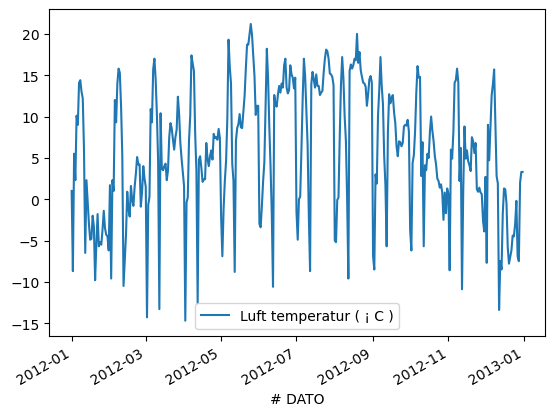

In [66]:
weather12.plot(x=0, y=1);

- This looks strange ...
- Culture clash: data from Europe, software from the US
    - that's why we got the warnings above
    - we need to tell `read_csv()` about out date format 

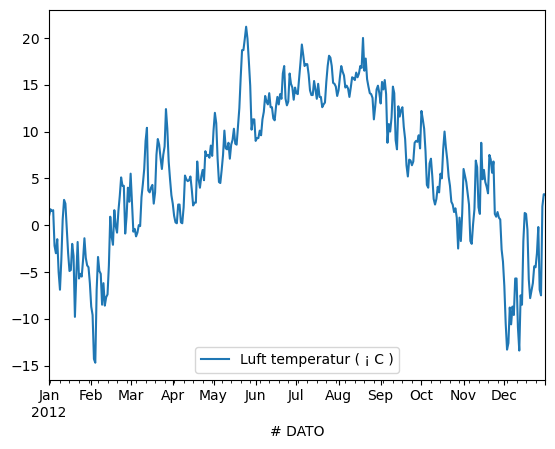

In [67]:
weather12 = pd.read_csv('weather_umb_2012.csv', encoding='latin-1', sep=';', 
                        parse_dates=[0], dayfirst=True)
weather12.plot(x=0, y=1);

- Much more plausible!
- Now we only need to provide better column names
- To do this safely, we explicitly map old to new names
- Since the old names are a bit complicated, we can proceed as follows
    1. Get pandas to print the current names
    1. Copy-paste that into a new cell and construct a dictionary mapping old to new names
    1. Update the column names

In [68]:
weather12.columns

Index(['# DATO', 'Luft temperatur ( ¡ C )', 'Luft temperatur min ( ¡ C )',
       'Luft temperatur max ( ¡ C )', 'GLOB(MJ/m2)', '%UV av GLOB'],
      dtype='object')

In [69]:
col_map = {'# DATO': 'Date', 
           'Luft temperatur ( ¡ C )': 'T_avg', 
           'Luft temperatur min ( ¡ C )': 'T_min',
           'Luft temperatur max ( ¡ C )': 'T_max',
           'GLOB(MJ/m2)': 'GLOB', 
           '%UV av GLOB': 'UV_rel'}

In [70]:
weather12.rename(col_map, axis=1, inplace=True)

- `axis=1` tells Pandas that we want to rename the columns
- `inplace=True` tells Pandas to modify the `weather12` data frame instead of returning a new one with the new names
- Here is the result

In [71]:
weather12.head()

Date  T_avg  T_min  T_max  GLOB  UV_rel
0 2012-01-01    1.0   -2.6    3.5  0.27    8.42
1 2012-01-02    1.7    0.4    3.7  0.56    7.01
2 2012-01-03    1.5   -0.1    3.5  0.34    6.66
3 2012-01-04    1.6   -1.1    4.1  0.58    6.64
4 2012-01-05   -2.2   -3.4   -0.2  0.96    6.51

- Plotting now looks a bit nicer

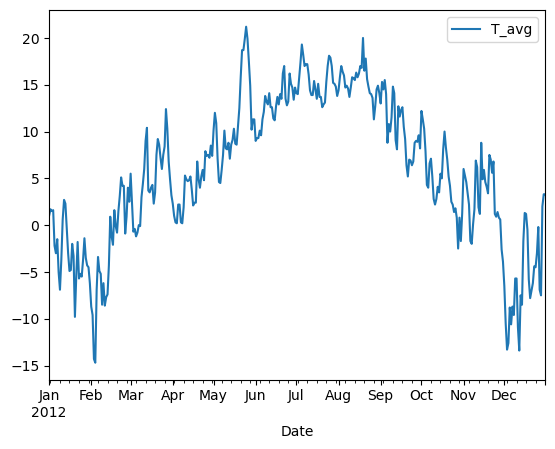

In [72]:
weather12.plot(x='Date', y='T_avg');

### Reading from an Excel file

- We use `Aas dogn 2003-2012.xlsx` as example
- The file has one sheet per year, named by year
- We will load data for just one year
- We do not want all columns, so we select a few

In [73]:
weather07 = pd.read_excel('Aas dogn 2003-2012.xlsx', sheet_name='2007', usecols='A:D,I')

In [74]:
weather07.head()

DATO  Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
0 2007-01-01                      3.8                          0.5   
1 2007-01-02                      1.9                          0.1   
2 2007-01-03                      1.7                         -1.7   
3 2007-01-04                      5.5                         -1.1   
4 2007-01-05                     -0.4                         -2.4   

   Luft temperatur max ( ° C )  Gras minimumstemperatur ( ° C )  
0                          6.0                             -3.5  
1                          3.9                             -6.0  
2                          6.4                             -7.6  
3                          7.3                             -6.0  
4                          2.8                             -8.6

In [75]:
weather07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATO                             365 non-null    datetime64[ns]
 1   Luft temperatur ( ° C )          365 non-null    float64       
 2   Luft temperatur min ( ° C )      365 non-null    float64       
 3   Luft temperatur max ( ° C )      365 non-null    float64       
 4   Gras minimumstemperatur ( ° C )  365 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


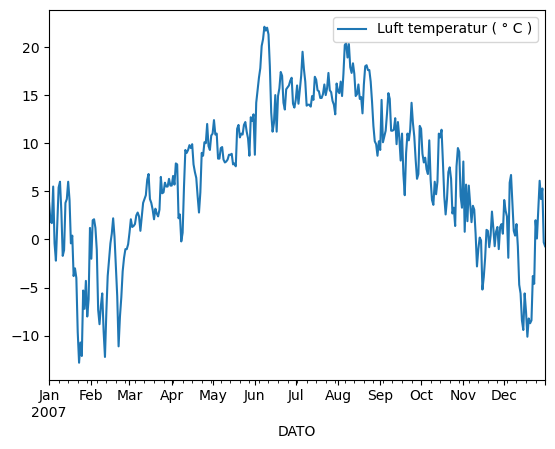

In [76]:
weather07.plot(x=0, y=1);

- Reading from Excel, reading of dates has clearly worked automatically.
- **BUT: Always check your data!** 
- In this case, a manual comparison with the Excel file shows that the data are imported correctly.
- When importing 2008-data in the same way, something goes wrong
    - Compare the x-axis labels in the plots for 2007 (above) and 2008 (below)!

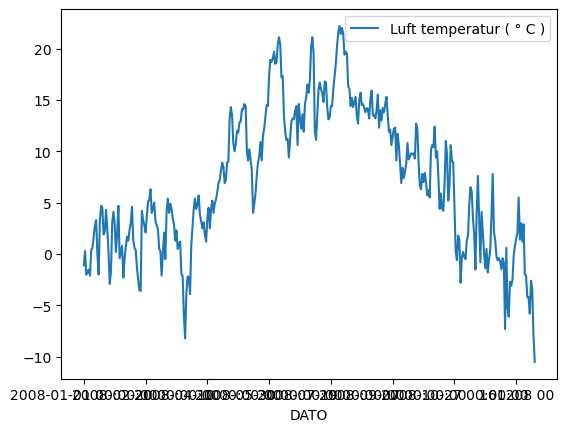

In [77]:
weather08 = pd.read_excel('Aas dogn 2003-2012.xlsx', sheet_name='2008', usecols='A:D,I')
weather08.plot(x=0, y=1);

- Looking at the top and bottom of the 2008-data shows that something goes wrong with the date format towards the end of the year!

In [78]:
weather08.head()

DATO  Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
0  2008-01-01 00:00:00                     -1.1                         -2.5   
1  2008-01-02 00:00:00                      0.3                         -0.8   
2  2008-01-03 00:00:00                     -2.0                         -3.1   
3  2008-01-04 00:00:00                     -1.8                         -3.2   
4  2008-01-05 00:00:00                     -1.5                         -3.1   

   Luft temperatur max ( ° C )  Gras minimumstemperatur ( ° C )  
0                         -0.1                             -3.0  
1                          1.3                             -1.5  
2                         -0.8                             -4.4  
3                         -0.8                             -5.7  
4                         -0.9                             -3.6

In [79]:
weather08.tail()

DATO  Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
361  271208 00                     -5.8                         -8.2   
362  281208 00                     -2.6                         -5.8   
363  291208 00                     -3.4                         -4.5   
364  301208 00                     -7.9                        -10.7   
365  311208 00                    -10.5                        -13.9   

     Luft temperatur max ( ° C )  Gras minimumstemperatur ( ° C )  
361                         -1.7                            -13.3  
362                         -0.8                            -10.9  
363                         -2.4                             -6.3  
364                         -4.6                            -15.8  
365                         -6.3                            -19.1

**The first law of data analysis: Always check your raw data one more time!**

------

### Reading number-like values as strings

- Consider the following file, containing [Dewey decimal codes](https://en.wikipedia.org/wiki/Dewey_Decimal_Classification) for books

In [80]:
print(open('books.csv').read())

Author;Title;Dewey
Knuth;The Art of Computer Programming;005.1
Stroustrup;The C++ Programming Language;005.133



- These look like floating point numbers, but are not: all digits must be preserved, and none added
- Loading into Pandas without further adjustment converts the codes to floats:

In [81]:
d = pd.read_csv('books.csv', sep=';')
d

Author                            Title  Dewey
0       Knuth  The Art of Computer Programming  5.100
1  Stroustrup     The C++ Programming Language  5.133

In [82]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Author  2 non-null      object 
 1   Title   2 non-null      object 
 2   Dewey   2 non-null      float64
dtypes: float64(1), object(2)
memory usage: 176.0+ bytes


- We need to specify the data type for the "Dewey" column to read it correctly as strings

In [83]:
d = pd.read_csv('books.csv', sep=';', dtype={'Dewey': str})

In [84]:
d

Author                            Title    Dewey
0       Knuth  The Art of Computer Programming    005.1
1  Stroustrup     The C++ Programming Language  005.133

In [85]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  2 non-null      object
 1   Title   2 non-null      object
 2   Dewey   2 non-null      object
dtypes: object(3)
memory usage: 176.0+ bytes
